## Homework 2 (Due - Feb'17th) - practice Supervised (KNN) and Un-Supervised (Clustering):

Follow the steps below to:
    - Read `wine.csv` in the data folder.
    - We are going to use this dataset to practice Supervised (KNN) and Un-Supervised (Clustering)
    
### Supervised (KNN)

    - Split the data into Train and Test (30%) using random_state of 42 (so that we all get same results)
    - Using KNN, can you predict the Wine class in test
    - How Accurate is your prediction
    
### Un-Supervised (Clustering)
    - The First Column contains the Wine Category.  Don't use it in the models below.  We are going to treat it as unsupervized learning and compare the results to the Wine column.
    - Try `KMeans` where `n_clusters = 3` and compare the clusters to the `Wine` column.
    - Try `Hierarchical Clustering` and plot dendogram
    - Compare the results of `KMeans` with that of Wine Column.  Is Clustering identifying the Wine groups correctly? 

Note that the Wine group codes will not match between Clustering and Wine Category.  What we are looking for is does all the wines in the cluster fall into the same Wine Category).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
df = pd.read_csv('../data/wine.csv')

In [3]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Supervised Learning (KNN)

In [4]:
# Get a list of Feature Columns
feature_cols = [col for col in df.columns if col != 'Wine']
print feature_cols

['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline']


In [5]:
# Create the X Matrix (of features)
X = df[feature_cols]

In [6]:
# Target vector
y = df['Wine']

In [7]:
# Split the data to train and test
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Do a KNN with Three Class levels
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(3, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

In [13]:
# Accuracy is 74%
clf.score(X_test, y_test)

0.7407407407407407

But there was a problem with this method.  We assumed all the values are of equal scale, but they are of different magnitudes.  Take a look at the first few rows and you will see that Proline is in a different scale than many other values.  So we need to scale these values

In [10]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
# DO KNN after we scale the values
from sklearn.preprocessing import StandardScaler

features_scalar = StandardScaler()

In [12]:
X_train_scaled = features_scalar.fit_transform(X_train)

In [13]:
# Do a KNN with Three Class levels
from sklearn import neighbors

clf_scaled = neighbors.KNeighborsClassifier(3, weights='uniform')
clf_scaled.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

In [14]:
# Accuracy is 74%
X_test_scaled = features_scalar.transform(X_test)

clf_scaled.score(X_test_scaled, y_test)

0.96296296296296291

woo-hoo Now we get 96% Accuracy.  What a differece scaling makes.  Remember to scale when using a Machine Learning technique that uses Distance metric.

### Un-Supervised (Clustering)

In [15]:
# Let's start over and get a list of Feature Columns
feature_cols = [col for col in df.columns if col != 'Wine']

In [16]:
X = df[feature_cols]

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='random', max_iter = 300, random_state=1)
Y_hat_kmeans = kmeans.fit(X).labels_

In [18]:
# Predicated Clusters
Y_hat_kmeans

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int32)

In [19]:
print y.values

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


As you can see, there are number of Mis-Classifications.  Wait a Minute.  We forgot to do Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [21]:
# Now do KMeans on Scaled X values

kmeans_scaled = KMeans(n_clusters=3, init='random', max_iter = 300, random_state=1)
Y_hat_kmeans_scaled = kmeans.fit(X_scaled).labels_

In [22]:
Y_hat_kmeans_scaled

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [23]:
print y.values

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


It's hard to see from these output, but these values are more closer than without scaling with fewer mis-classification for class=2 in y_hat

#### Hierarchial Clustering

In [24]:
# compute distance matrix
from scipy.spatial.distance import pdist, squareform

# not printed as pretty, but the values are correct
distx = squareform(pdist(X_scaled, metric='euclidean'))
distx

array([[ 0.        ,  3.49753522,  3.02660794, ...,  6.4909413 ,
         6.07878091,  7.18442107],
       [ 3.49753522,  0.        ,  4.1429119 , ...,  6.39689969,
         6.09492714,  7.36771922],
       [ 3.02660794,  4.1429119 ,  0.        , ...,  6.25367723,
         5.85179331,  6.35388503],
       ..., 
       [ 6.4909413 ,  6.39689969,  6.25367723, ...,  0.        ,
         1.82621785,  3.39251526],
       [ 6.07878091,  6.09492714,  5.85179331, ...,  1.82621785,
         0.        ,  3.32427633],
       [ 7.18442107,  7.36771922,  6.35388503, ...,  3.39251526,
         3.32427633,  0.        ]])

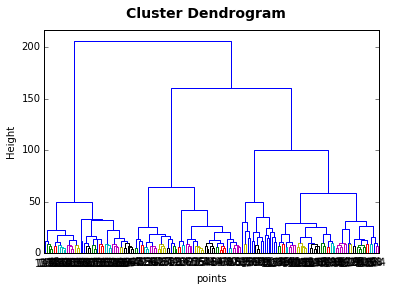

In [25]:
# perform clustering and plot the dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

R = dendrogram(linkage(distx, method='ward'), color_threshold=10)

plt.xlabel('points')
plt.ylabel('Height')
plt.suptitle('Cluster Dendrogram', fontweight='bold', fontsize=14);